# Objectives:

1. Implement data preprocessing to summarize the features in the time series. The features hypothesized to be useful are as follows:
    * Band Spectrum Energy (eeg.get_power) (for EEG)
    * Fractal Dimension of Time Series (pyEEG)
    * Skewness and Kurtosis of the distributions (scipy.stats)
    * Regular stats (mean, median, max, min of time series)
    
2. Models to train:
    * Linear Chain Conditional Random Field with structured SVM solver with a 1-slack QP with L1 slack penalty (pystruct)
    * A simple SVM like Andreas (sklearn SVC)
    * A Hidden Markov model?
    
3. Cross Validate:
    * Build a proper function/system for leave-one-subject-out CV
    * Test models and ensembles on it


In [210]:
import importlib
import utils
importlib.reload(utils)
import utils
from utils import *

In [10]:
xtrain_eeg1, xtrain_eeg2, xtrain_emg, ytrain, xtest_eeg1, xtest_eeg2, xtest_emg = load_data()

Loading xtrain...
Shapes: (64800, 512) (64800, 512) (64800, 512)
Loading ytrain...
Shape: (64800, 1)
Loading xtest...
Shapes: (43200, 512) (43200, 512) (43200, 512)


In [12]:
[meann, mediann, stdd, maxx, minn] = simple_statistics(xtrain_eeg1)

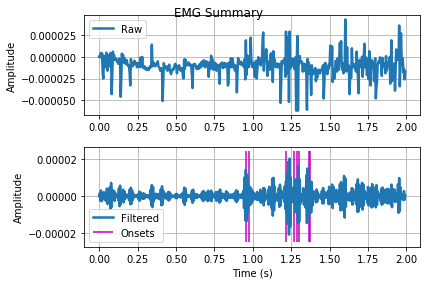

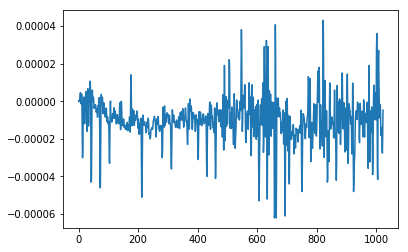

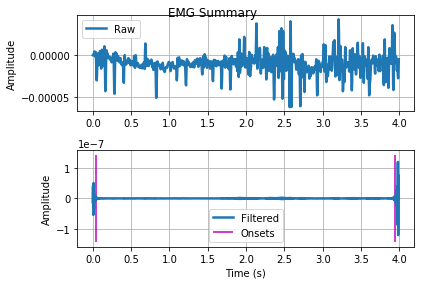

(1024,) (512,)


In [113]:
# For some reason, only works if I pass in double the sampling rate of 128Hz
[ts, filtered, onsets] = emg.emg(xtrain_emg.values[25], sampling_rate=128*2)
# [on_meann, on_mediann, on_stdd, on_maxx, on_minn] = simple_statistics(onsets)
np.mean(np.diff(onsets))
np.std(np.diff(onsets))
onsets

newboy = scipy.signal.resample(xtrain_emg.values[25], num = xtrain_emg.values[25].shape[0]*2)
plt.plot(newboy)
[tsnew, filterednew, onsetsnew] = emg.emg(newboy, sampling_rate=128*2)
print(newboy.shape, xtrain_emg.values[25].shape)

# Model Implementation: Conditional 

In [ ]:
# CRF

print("Starting CRF...")
classes = np.array([1,2,3])
weights_crf = compute_class_weight("balanced", classes, y_train)
weights_crf[0] = weights_crf[0]+2.5
weights_crf[1] = weights_crf[1]+1.5

X_train_crf = X_train.reshape(3, -1, 49)
y_train_crf = y_train.reshape(3,-1) -1
    
X_test_crf = X_test.reshape(2, -1, 49)

model = ChainCRF(class_weight=weights_crf)
ssvm = OneSlackSSVM(model=model, C=0.1, max_iter=2000)
    
ssvm.fit(X_train_crf, y_train_crf)   
   
y_pred_crf = ssvm.predict(X_test_crf)
y_pred_crf = np.asarray(y_pred_crf).reshape(-1) + 1  
y_pred_filtered_crf = medfilt(y_pred_crf, FILTER_WINDOW)


print(f"CRF unique predictions {np.unique(y_pred_filtered_crf)}")